In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, 
                            summarize, 
                            poly)

In [2]:
Boston = load_data("Boston")

In [3]:
names = Boston.columns.drop("crim")
to_print = "\testimated\tp-value\n"
univariate_coefficients = []
for name in names: 
    X = MS([name]).fit_transform(Boston)
    y = Boston.crim
    model = sm.OLS(y, X)
    results = model.fit()

    coefficient = results.params[name]
    pvalue = results.pvalues[name]
    temp = "%s\t%.4f\t\t%.4f" %(name, coefficient, pvalue)
    if pvalue < 0.05: 
        temp += "\t*"
    to_print += temp + "\n"

    univariate_coefficients.append(coefficient)
print(to_print)

	estimated	p-value
zn	-0.0739		0.0000	*
indus	0.5098		0.0000	*
chas	-1.8928		0.2094
nox	31.2485		0.0000	*
rm	-2.6841		0.0000	*
age	0.1078		0.0000	*
dis	-1.5509		0.0000	*
rad	0.6179		0.0000	*
tax	0.0297		0.0000	*
ptratio	1.1520		0.0000	*
lstat	0.5488		0.0000	*
medv	-0.3632		0.0000	*



In [4]:
X = MS(names).fit_transform(Boston)
y = Boston.crim
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,13.7784,7.082,1.946,0.052
zn,0.0457,0.019,2.433,0.015
indus,-0.0584,0.084,-0.698,0.486
chas,-0.8254,1.183,-0.697,0.486
nox,-9.9576,5.290,-1.882,0.060
rm,0.6289,0.607,1.036,0.301
age,-0.0008,0.018,-0.047,0.962
dis,-1.0122,0.282,-3.584,0.000
rad,0.6125,0.088,6.997,0.000
tax,-0.0038,0.005,-0.730,0.466


Text(0, 0.5, 'multiple linear regression coefficients')

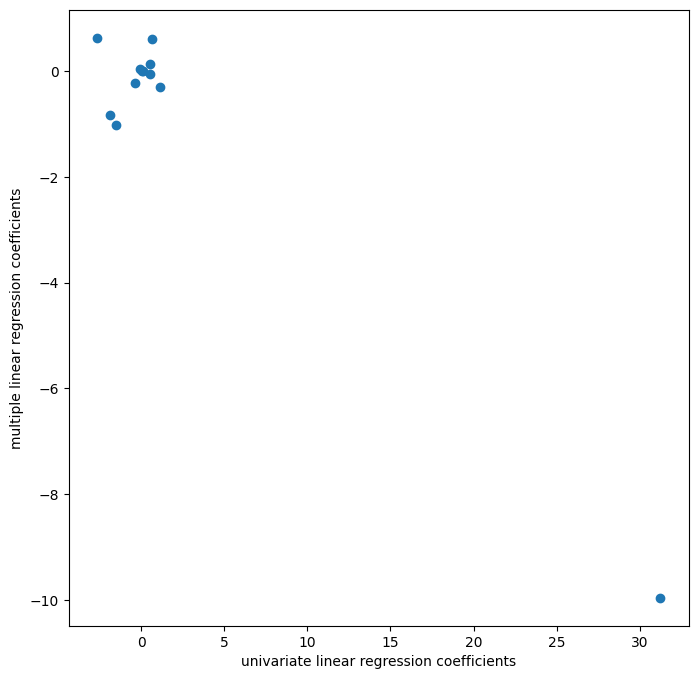

In [5]:
multivariate_coefficients = results.params.drop("intercept")
ax = subplots(figsize = (8, 8))[1]
ax.scatter(univariate_coefficients, multivariate_coefficients)
ax.set_xlabel("univariate linear regression coefficients")
ax.set_ylabel("multiple linear regression coefficients")

In [15]:
# to_print = "\testimated\tp-value\n"
for name in names: 
    X = MS([poly(name, degree = 3)]).fit_transform(Boston)
    y = Boston.crim
    model = sm.OLS(y, X)
    results = model.fit()
    print(results.summary().tables[1])
    # coefficient = results.params[1]
    # pvalue = results.pvalues[1]
    # temp = "%s\t%.4f\t\t%.4f" %(name, coefficient, pvalue)
    # if pvalue < 0.05: 
    #     temp += "\t*"
    # to_print += temp + "\n"

print(to_print)

                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
intercept                 3.6135      0.372      9.709      0.000       2.882       4.345
poly(zn, degree=3)[0]   -38.7498      8.372     -4.628      0.000     -55.199     -22.301
poly(zn, degree=3)[1]    23.9398      8.372      2.859      0.004       7.491      40.389
poly(zn, degree=3)[2]   -10.0719      8.372     -1.203      0.230     -26.521       6.377
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
intercept                    3.6135      0.330     10.950      0.000       2.965       4.262
poly(indus, degree=3)[0]    78.5908      7.423     10.587      0.000      64.007      93.175
poly(indus, degree=3)[1]   -24.3948      7.423     -3.286      0.001     -38.979      -9